In [166]:

# Append main folder
import sys
sys.path.append("../")

import numpy as np 
from dotmap import DotMap
from neuralg.utils.count_parameters import count_parameters
from neuralg.models.nerf import EigNERF
from neuralg.models.siren import EigSiren
from neuralg.training.train_model import train_model
from neuralg.training.save_run import save_run
from neuralg.utils.set_log_level import set_log_level

d = 5 # 
batch_size = 64
train_matrix_parameters = DotMap({"N":batch_size, 
                            "operation": "eig", 
                            "d": d, 
                            "wigner": True})

run_params = DotMap({ "epoch": 1, # Number of epochs
                           "iterations": 10000, # Batches per epoch
                           "lr": 3e-4} )       # Learning rate

In [167]:
import torch
from loguru import logger

training_runs = DotMap({"models": [], "no_parameters": [],  "loss_logs": [], "accuracy": []})

for hidden_layers in torch.arange(4,11,2):
    run = DotMap()
    skip = torch.arange(2,hidden_layers-1,2)
    for n_neurons in [25,50,100,200]: 
        #model = EigNERF(d,d**2,n_neurons= n_neurons,skip = skip, hidden_layers=hidden_layers)
        model = EigSiren(d,hidden_features = n_neurons, hidden_layers=hidden_layers)
        no_parameters = count_parameters(model)
        logger.trace(f'Training model with {hidden_layers} hidden layers, {n_neurons} neurons, skipping layer(s) {skip}')
        training_run = train_model(model,train_matrix_parameters,run_parameters= run_params)
        training_runs.no_parameters.append(count_parameters(model))
        training_runs.models.append(training_run.model)
        training_runs.loss_logs.append(training_run.results)


epoch=1 	 It=1000	 loss=4.548e-01	 lr=3.000e-04 	 weighted_average=4.651e-01 eval_loss=4.667e-01	
epoch=1 	 It=2000	 loss=2.870e-01	 lr=3.000e-04 	 weighted_average=3.043e-01 eval_loss=3.214e-01	
epoch=1 	 It=3000	 loss=2.730e-01	 lr=3.000e-04 	 weighted_average=2.737e-01 eval_loss=2.899e-01	
epoch=1 	 It=4000	 loss=2.381e-01	 lr=3.000e-04 	 weighted_average=2.406e-01 eval_loss=2.541e-01	
epoch=1 	 It=5000	 loss=2.232e-01	 lr=3.000e-04 	 weighted_average=2.213e-01 eval_loss=2.311e-01	
epoch=1 	 It=6000	 loss=2.067e-01	 lr=3.000e-04 	 weighted_average=2.088e-01 eval_loss=2.202e-01	
epoch=1 	 It=7000	 loss=2.007e-01	 lr=3.000e-04 	 weighted_average=2.035e-01 eval_loss=2.178e-01	
epoch=1 	 It=8000	 loss=1.991e-01	 lr=3.000e-04 	 weighted_average=2.015e-01 eval_loss=2.156e-01	
epoch=1 	 It=9000	 loss=1.883e-01	 lr=3.000e-04 	 weighted_average=2.002e-01 eval_loss=2.121e-01	
epoch=1 	 It=1000	 loss=3.085e-01	 lr=3.000e-04 	 weighted_average=3.038e-01 eval_loss=2.823e-01	
epoch=1 	 It=2000	 l

In [35]:
save_run(training_runs)

09:07:50|neuralg-INFO| Saving run to file: ../results//12-04-2022 09-07-50_run.pk


In [164]:
from neuralg.evaluation.evaluate_model import evaluate_model
from neuralg.evaluation.compute_accuracy import compute_accuracy
from copy import deepcopy
import matplotlib.pyplot as plt
import pickle
file_path = '/Users/toveagren/ESA/NLAAP/results/prel_acc_study_nerf.pk'
# open a file, where you stored the pickled data
file = open(file_path, 'rb')

# dump information to that file
data = pickle.load(file)
test_parameters = deepcopy(train_matrix_parameters)
test_parameters["N"] = 10000
tol = 0.05
for i, model in enumerate(data.models):
    errors = evaluate_model(model,test_parameters)
    accuracy = compute_accuracy(tol,errors)
    data.accuracy.append(accuracy)



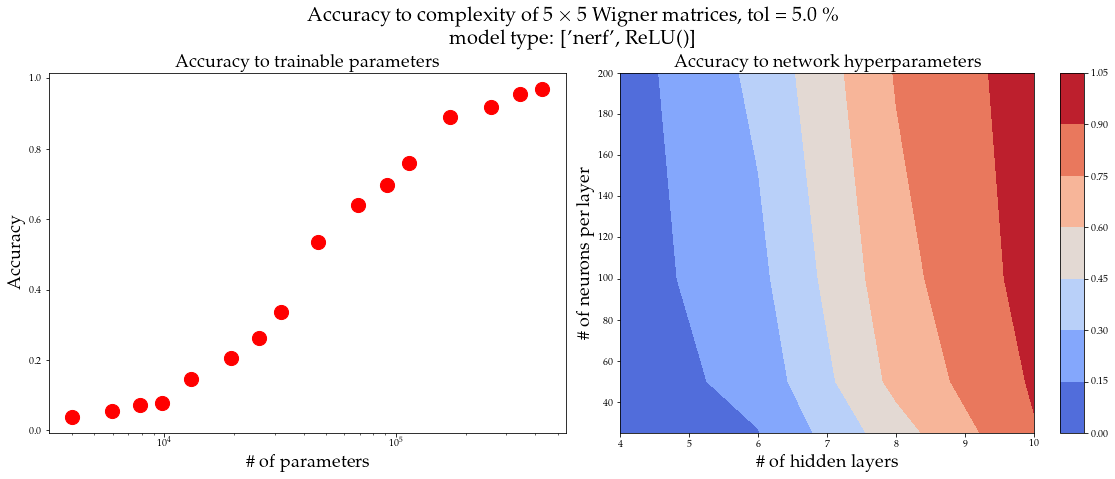

In [171]:
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

from matplotlib import cm
fig = plt.figure(facecolor= 'white')
fig.patch.set_facecolor('white')
spec = fig.add_gridspec(2, 2)
fig.suptitle("Accuracy to complexity of $ {} \\times {}$ Wigner matrices, tol = {} $\%$ \n model type: {} ".format(d,d,100*tol,[data.models[0].model_type,data.models[0].net[0].activation]), fontsize = 20)

ax = fig.add_subplot(spec[0, 0])
ax.scatter(data.no_parameters,data.accuracy, s = 200, color='red', marker='o')
ax.set_title("Accuracy to trainable parameters ".format(100*tol), fontsize = 18)
ax.set_xlabel("$\#$ of parameters ", fontsize = 18)
ax.set_ylabel("Accuracy", fontsize = 18)
ax.set_xscale('log')

ax = fig.add_subplot(spec[0, 1])
xgrid, ygrid = np.meshgrid(np.arange(4,11,2), [25,50,100,200])
surf = ax.contourf(xgrid, ygrid, torch.flatten(torch.tensor(data.accuracy)).reshape((len(xgrid),len(ygrid))), cmap=cm.coolwarm,vmin = 0, vmax = 1)
ax.set_title("Accuracy to network hyperparameters ".format(100*tol), fontsize = 18)
ax.set_xlabel("$\#$ of hidden layers ", fontsize = 18)
ax.set_ylabel("$\#$ of neurons per layer ", fontsize = 18)

fig.colorbar(surf, aspect=15)
plt.tight_layout()





In [160]:
data.accuracy

[tensor(0.0013),
 tensor(0.0067),
 tensor(0.0485),
 tensor(0.2517),
 tensor(0.0017),
 tensor(0.0108),
 tensor(0.0693),
 tensor(0.2812),
 tensor(0.0040),
 tensor(0.0154),
 tensor(0.1048),
 tensor(0.3711),
 tensor(0.0015),
 tensor(0.0227),
 tensor(0.1303),
 tensor(0.4234)]